<a href="https://colab.research.google.com/github/arbeeorlar/data_science/blob/main/Linear_regression_and_XGBoost.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [41]:
pip install xgboost

In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import warnings
warnings.filterwarnings('ignore')
import xgboost as xgb
#

In [43]:
url = 'https://raw.githubusercontent.com/gakudo-ai/open-datasets/main/housing.csv'
df = pd.read_csv(url)
copy = df.copy()
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [44]:
df.shape

(20640, 10)

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [46]:
df.duplicated().sum()

np.int64(0)

In [47]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
longitude,20640.0,-119.569704,2.003532,-124.3500,-121.8000,-118.4900,-118.01000,-114.3100
latitude,20640.0,35.631861,2.135952,32.5400,33.9300,34.2600,37.71000,41.9500
housing_median_age,20640.0,28.639486,12.585558,1.0000,18.0000,29.0000,37.00000,52.0000
total_rooms,20640.0,2635.763081,2181.615252,2.0000,1447.7500,2127.0000,3148.00000,39320.0000
total_bedrooms,20433.0,537.870553,421.385070,1.0000,296.0000,435.0000,647.00000,6445.0000
population,20640.0,1425.476744,1132.462122,3.0000,787.0000,1166.0000,1725.00000,35682.0000
households,20640.0,499.539680,382.329753,1.0000,280.0000,409.0000,605.00000,6082.0000
median_income,20640.0,3.870671,1.899822,0.4999,2.5634,3.5348,4.74325,15.0001
median_house_value,20640.0,206855.816909,115395.615874,14999.0000,119600.0000,179700.0000,264725.00000,500001.0000


In [48]:
list(df["ocean_proximity"].unique())

['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND']

In [49]:
df_numeric = df.select_dtypes(include=np.number).dropna()
df_numeric.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0


In [50]:
df_numeric.shape

(20433, 9)

In [51]:
df_numeric.isna().sum()

,0
longitude,0
latitude,0
housing_median_age,0
total_rooms,0
total_bedrooms,0
population,0
households,0
median_income,0
median_house_value,0


In [52]:
y = df_numeric["median_house_value"]
x = df_numeric.drop("median_house_value", axis=1)

In [53]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [54]:
#scaling for better  model perfomance,
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [55]:
lr_model = LinearRegression()
lr_model.fit(x_train_scaled, y_train)
y_pred_lr = lr_model.predict(x_test_scaled)

In [56]:
print("Linear Regression:")
print("  RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_lr)))
print("  R²:", r2_score(y_test, y_pred_lr))

Linear Regression:
  RMSE: 70025.94402055633
  R²: 0.6377762608657407


**XGBOOST**

XGBoost is an ensemble model; that is, a combination of single models that “join forces” to solve a single predictive task. These models usually surpass the boundaries of simpler, individually trained models in terms of prediction accuracy, significantly improving performance in most scenarios.

In [57]:
xgb_model = xgb.XGBRegressor()
xgb_model.fit(x_train_scaled, y_train)
y_pred_xgb = xgb_model.predict(x_test_scaled)

In [58]:

print("\nXGBoost:")
print("  RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_xgb)))
print("  R²:", r2_score(y_test, y_pred_xgb))


XGBoost:
  RMSE: 48436.46206828704
  R²: 0.8266979133126716


While not yet perfect, we can see a significant improvement in prediction accuracy: the RSME has been reduced by 30%, and the R² has increased from 0.64 to nearly 0.83.

It is also possible to analyze the feature importance of both models, as follows. For the linear regression model, we access the learned values for the coefficients and bias term by accessing the coef_ and intercept_ object attributes of the model:


In [59]:
weights = lr_model.coef_
intercept = lr_model.intercept_

print("\nLinear Regression Model Weights (Coefficients):")
for feature, weight in zip(x.columns, weights):
  print(f"  {feature}: {weight}")

print("\nLinear Regression Model Intercept:")
print(f"  {intercept}")


Linear Regression Model Weights (Coefficients):
  longitude: -86213.51301116456
  latitude: -91473.1604053909
  housing_median_age: 14408.8614690844
  total_rooms: -17846.275216795897
  total_bedrooms: 45971.21052309778
  population: -43836.303286778704
  households: 20362.11026834444
  median_income: 76146.2722814509

Linear Regression Model Intercept:
  206580.12749296476


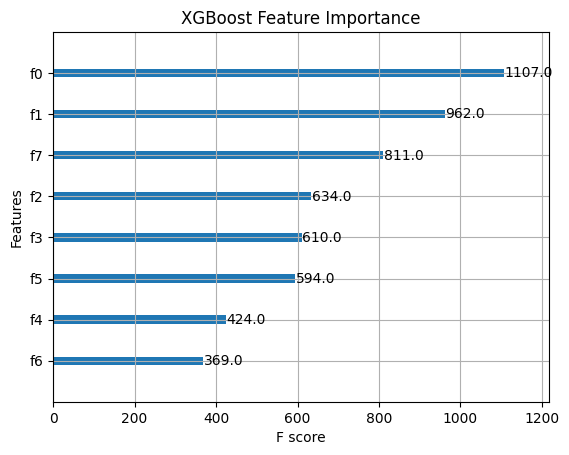

In [60]:
xgb.plot_importance(xgb_model)
plt.title("XGBoost Feature Importance")
plt.show()

Linear regression can constitute a good baseline and, given its simplicity and manageable number of learnable parameters, is easily interpretable by simply looking at its learned weights. Importantly, linear models like this may be limited when the data used to train them has primarily non-linear patterns.

XGBoost significantly improves performance in most scenarios, including the housing dataset used in this article. It has a remarkable ability to model complex, non-linear patterns and interactions between features due to being based on decision trees.